Import Modules

In [27]:
import sklearn
import numpy
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
%pip install scikit-learn==1.3.0


Loading the dataset

In [33]:
#load the csv data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
#deleting id column
df = df.drop(columns =['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#display basic stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
#display no. of species on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing Dataset

In [38]:
#check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Analysis 

<Axes: >

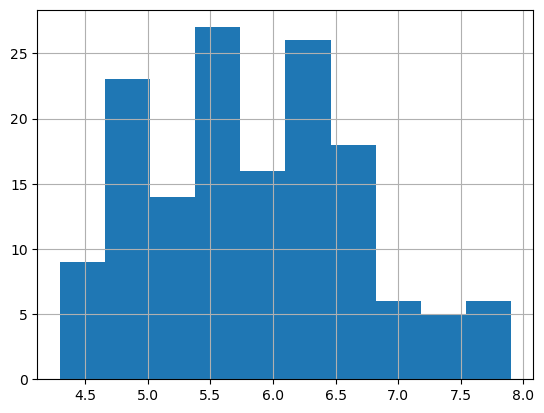

In [39]:
df['SepalLengthCm'].hist()

<Axes: >

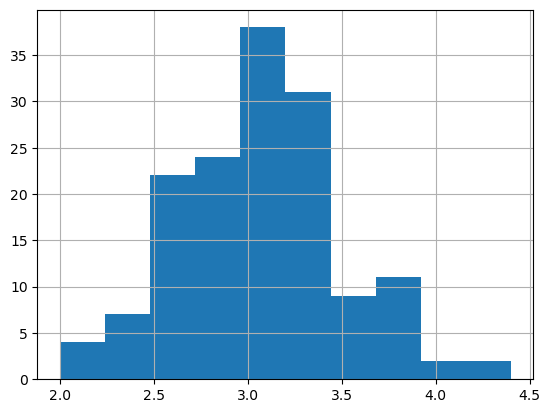

In [40]:
df['SepalWidthCm'].hist()

<Axes: >

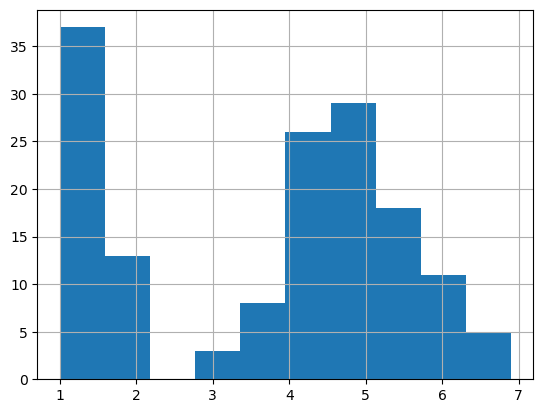

In [41]:
df['PetalLengthCm'].hist()

<Axes: >

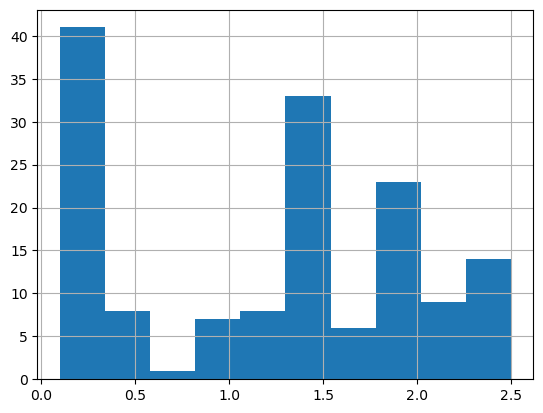

In [42]:
df['PetalWidthCm'].hist()

In [18]:
#create list of colours and class labels
colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']


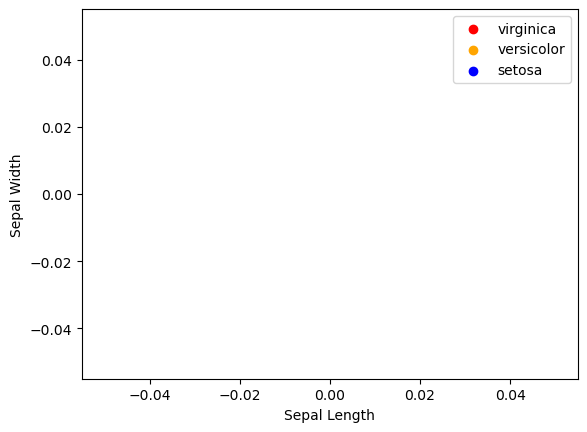

In [81]:
for i in range(3):
    #filter data on each class
    x = df[df['Species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

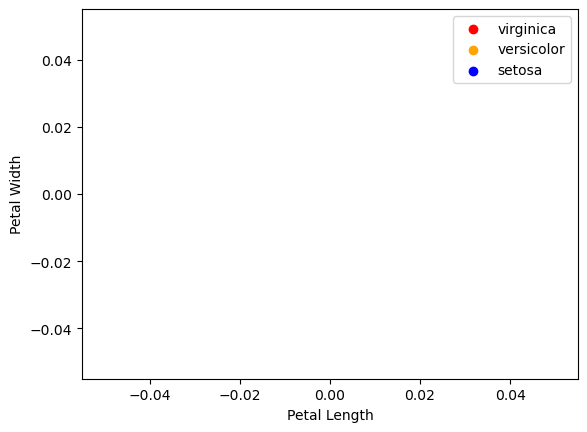

In [48]:
for i in range(3):
    #filter data on each class
    x = df[df['Species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
   
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

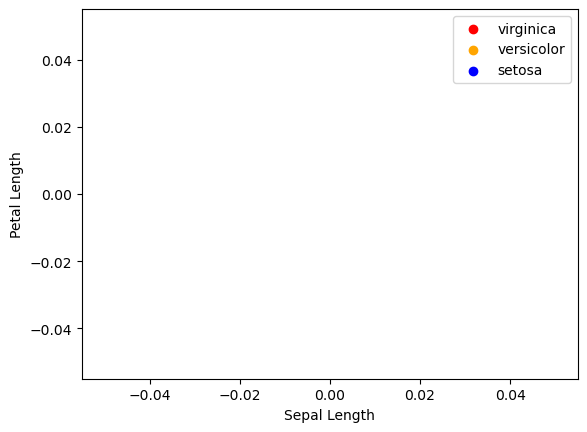

In [49]:
for i in range(3):
    #filter data on each class
    x = df[df['Species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])

    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

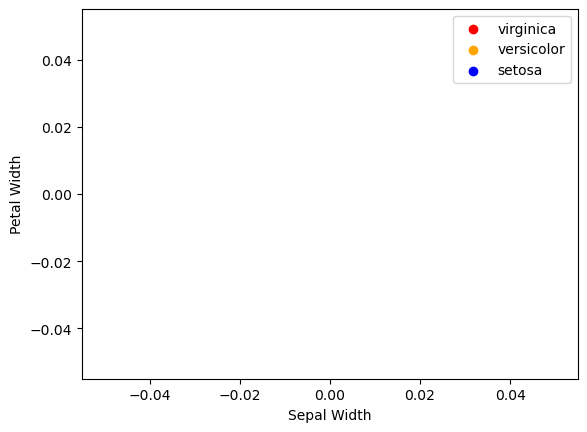

In [50]:
for i in range(3):
    #filter data on each class
    x = df[df['Species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
   

    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

Correlation Matrix

In [53]:
import pandas as pd

# Assuming 'species' is a categorical column
df_one_hot = pd.get_dummies(df, columns=['Species'], prefix='Species')

# Exclude non-numeric columns before calling corr()
numeric_df = df_one_hot.select_dtypes(include=['float64', 'int64'])

# Display the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


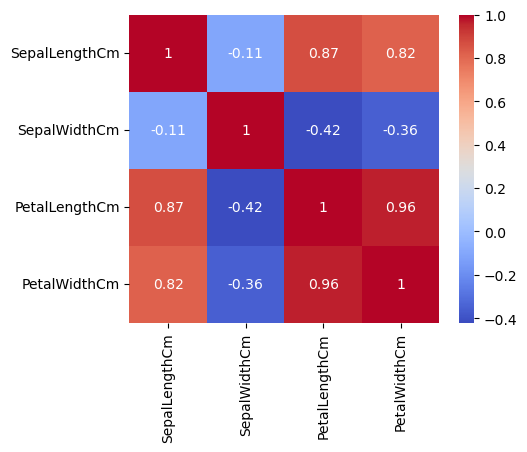

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'species' is a categorical column
df_one_hot = pd.get_dummies(df, columns=['Species'], prefix='Species')

# Exclude non-numeric columns before calling corr()
numeric_df = df_one_hot.select_dtypes(include=['float64', 'int64'])

# Display the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap='coolwarm')

plt.show()


Label Encoder

In [58]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# transform the string labels to integer
#def['Species'] = le.fit_transform9df['Species'])
#def.head()

Model Training and Testing 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns=['Species'])
#output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

In [60]:
#Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  97.77777777777777


In [61]:
#model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [62]:
#print metric to get perfomance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [65]:
#K-nearest Neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest Neighbors Accuracy: ", model.score(x_test, y_test)*100)

K-nearest Neighbors Accuracy:  97.77777777777777


In [67]:
#model training
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [66]:
#print metric to get Perfomance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [69]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ",model.score(x_test, y_test)*100)

Decision Tree Accuracy:  97.77777777777777


In [70]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [71]:
#print metric to get Perfomance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [72]:
#save the model
import pickle 
filename = 'saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [73]:
import pickle

In [74]:
#save the updated model
filename = 'saved_model.sav'
try: 
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        print("Model Saved Succcessfully.")
except Exception as e:
    print(f"Error Saving the model: {e}")

Model Saved Succcessfully.


In [75]:
load_model = pickle.load(open(filename, 'rb'))

In [76]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [78]:
import sklearn
print(sklearn.__version__)


1.3.0


In [79]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
58,6.6,2.9,4.6,1.3
93,5.0,2.3,3.3,1.0
108,6.7,2.5,5.8,1.8
69,5.6,2.5,3.9,1.1
52,6.9,3.1,4.9,1.5


In [80]:

load_model.predict([[4, 3, 1, 5]])

array(['Iris-setosa'], dtype=object)